In [331]:
from utils import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [332]:
df1 = []
df = data_pre(df1)

#### Analysis for each column

In [333]:
############################### CITY ANALYSIS #################################

In [334]:
# City cleaning
german_cities_=['munich', 'berlin', 'hamburg', 'wolfsburg', 'stuttgart',
       'schleswig-holstein','konstanz area', 'frankfurt',
       'cologne', 'kempten', 'münster', 'erlangen','rosenheim', 'mannheim ', 'boeblingen', 'düsseldorf', 'ingolstadt',
       'nürnberg', 'ansbach', 'leipzig','tuttlingen', 'bonn','koblenz','heidelberg', 'karlsruhe', 'köln',
       'aachen', 'dusseldorf','würzburg','braunschweig ', 'dresden','stuttgart ','lübeck', 'nuremberg ', 'bodensee', 'paderborn',
       'konstanz', 'ulm', 'düsseldorf ','bölingen','hannover','siegen','nuremberg', 'friedrichshafen', 'walldorf','regensburg','heilbronn',
       'dortmund', 'jena','brunswick','bielefeld','hildesheim', 'heidelberg ', 'murnau am staffelsee ','hildesheim ','dusseldurf','darmstadt',
        'duesseldorf','ingolstadt ','saarbrücken'] 
def clean_cities_col(df):
    df_cleaned = df[df['City'].isin(german_cities_)]
    # Remove the leading & trailing spaces and unify the names
    df_cleaned['City']=df_cleaned['City'].str.strip()\
        .str.replace('dusseldurf', 'düsseldorf')\
        .str.replace('duesseldorf','düsseldorf')\
        .str.replace('dusseldorf','düsseldorf')
    value_counts=df_cleaned['City'].value_counts()
    mask = df_cleaned['City'].isin(value_counts.index[value_counts < 10])
    df_cleaned = df_cleaned.loc[~mask]  
    return df_cleaned
df = clean_cities_col(df)
df['City'].value_counts()

C:\Users\Nadeen\AppData\Local\Temp\ipykernel_6300\4064726852.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['City']=df_cleaned['City'].str.strip()\


City
berlin        1111
munich         476
frankfurt       94
hamburg         74
stuttgart       48
cologne         36
düsseldorf      26
Name: count, dtype: int64

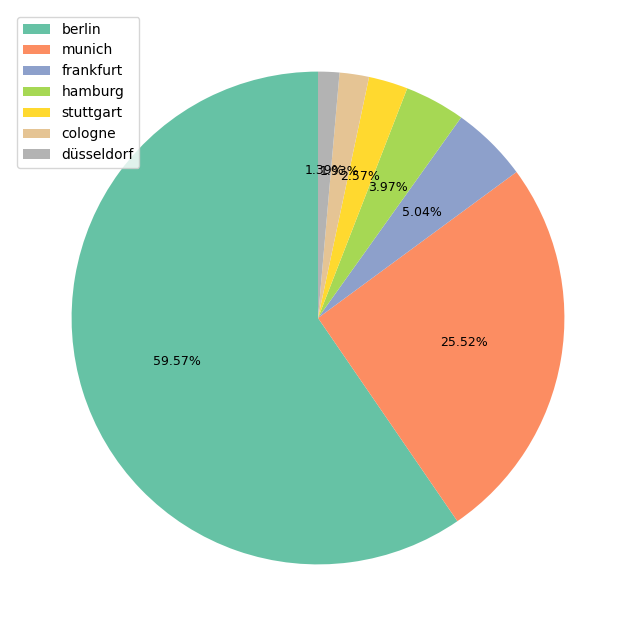

In [335]:
# draw chart to display precentage for each city in the data 
# Top 6 City on the survey 
plt.figure(figsize=(8,8))
df['City'].value_counts().iloc[:7].plot.pie(autopct="%1.2f%%",fontsize=9,startangle=90,labels=['']*7,cmap='Set2')
plt.ylabel("")
plt.legend(loc='upper left',labels=df['City'].value_counts().iloc[:7].index)
plt.show()

#### Comment on cities:
1. it seems that the most frequent city is Berlin then the cities frequency is ordered as follow Berlin,Munich,Frankfurt,Hamburg,Stuttgart,Cologne,dusseldrof
2. Expectations : 1. Berlin will have the biggest % as it is capital of Germany
3. Matched

In [336]:
######################## END OF EXPLORING CITIES #########################

In [337]:
######################## POSITION ANALYSIS  #######################

In [338]:
# position cleaning 
def clean_pos_col(df):
    # Cleaning using fuzz library 
    positions = df['Position'].unique()
    standardized_positions = {}
    for position in positions:
        if position in standardized_positions:
            continue
        matches = process.extract(position, positions, scorer=fuzz.token_sort_ratio, limit=None)
        best_match, score = max(matches, key=lambda x: x[1])
        if score >= 80:
            standardized_positions[position] = best_match
            for synonym in matches:
                if synonym[1] >= 80:
                    standardized_positions[synonym[0]] = best_match
        else:
            standardized_positions[position] = position
    df['Position'] = df['Position'].map(standardized_positions)
    #Cleaning Manually 
    for i, row in df.iterrows():
        print(row['Position'])
        if row['Position'] in ['qa engineer' , 'qa lead' , 'qa manager' , 'working student(qa)']:
            df.at[i,'Position'] = 'qa'
        if row['Position'] in ['product Manager','engineering team lead','engineering manager','technical account manager' , 'technical project manager'  , 'project manager']:
            df.at[i,'Position'] = 'product manager'
        if row['Position'] in ['embedded developer','lead developer','lead software developer','sap consultant','sap developer','tech lead / full-stack','sw architect','software architect','software architekt','fullstack engineer','full-stack developer','fullstack developer','embedded software engineer','ну или software engineer']:
            df.at[i,'Position'] = 'software engineer'
        if row['Position'] in ['testmanager','qa manager','qa lead','qa automation engineer','qa manager','test manager','qa engineer','software developer in test','working student (qa)']:
            df.at[i,'Position'] = 'software tester'
        if row['Position'] in ['business analyst','data analyst','data engineer','data architect','dana analyst','analytics engineer','bi analyst','bi it consultant','bi consultant','bi developer / data scientist','head of bi','bi developer / data engineer','big data engineer','senior data engineer' , 'data science manager' , 'analyst','bi consultant sap/ data engineer','db developer/data analyst','technical business analyst']:
            df.at[i,'Position'] = 'data scientist'
        if row['Position'] in ['systemadministrator']:
            df.at[i,'Position'] = 'system administrator'
        if row['Position'] in ['nlp engineer']:
            df.at[i,'Position'] = 'machine learning engineer'
        if row['Position'] in ['it operations manager','head of it','it consulting','it manager','it spezialist','erp consultant']:
            df.at[i,'Position'] = 'it'
        if row['Position'] in ['sre']:
            df.at[i,'Position'] = 'devops'
    df  = df[df['Position'] !='nan']
    value_counts =df['Position'].value_counts()
    mask = df['Position'].isin(value_counts.index[value_counts < 10])
    df = df.loc[~mask] 
    return df
df = clean_pos_col(df)

software engineer
backend developer
software engineer
frontend developer
backend developer
devops
frontend developer
frontend developer
backend developer
software engineer
data engineer
software engineer
software engineer
software engineer
designer (ui/ux)
backend developer
product manager
backend developer
mobile developer
devops
software architect
software engineer
backend developer
software engineer
team lead
devops
test manager
devops
product manager
software engineer
backend developer
qa engineer
software engineer
software engineer
data scientist
designer (ui/ux)
software engineer
backend developer
devops
frontend developer
software engineer
frontend developer
software engineer
software engineer
software engineer
designer (ui/ux)
backend developer
backend developer
software engineer
backend developer
designer (ui/ux)
qa engineer
backend developer
backend developer
software engineer
software engineer
devops
software engineer
software engineer
software engineer
backend developer
fro

In [339]:
df['Position'].value_counts()

Position
software engineer            517
backend developer            301
data scientist               290
it                           108
frontend developer           107
devops                        94
software tester               93
mobile developer              71
machine learning engineer     68
product manager               55
qa                            33
designer (ui/ux)              16
Name: count, dtype: int64

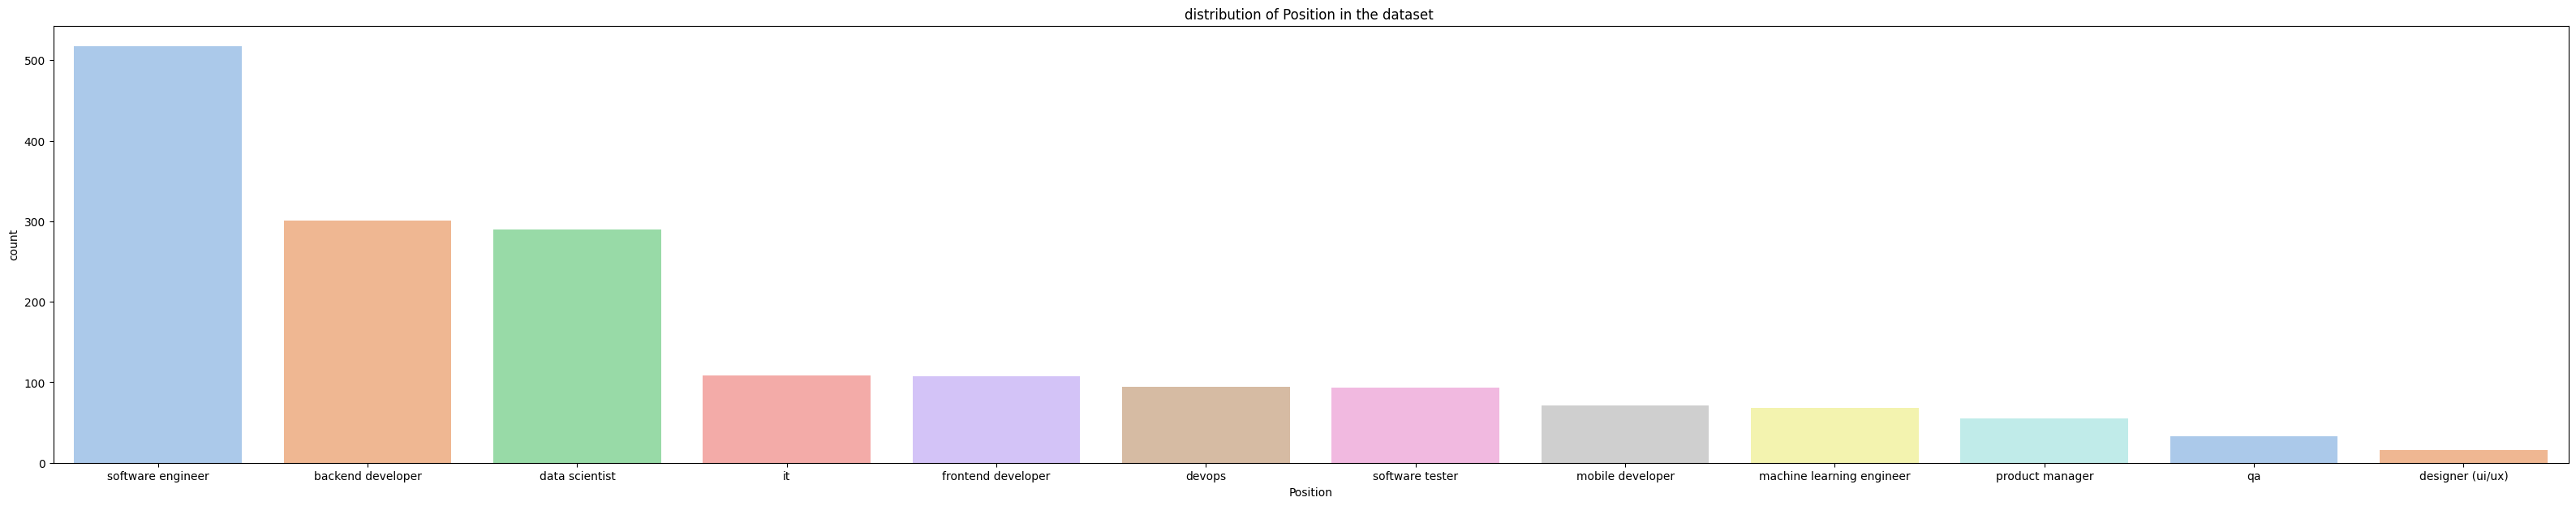

In [340]:
######################################### Draw histogram for positions in the dataset ############################
import matplotlib.pyplot as plt
# create a histogram
plt.figure(figsize=(40,7))
sns.countplot(x = 'Position', data = df, palette = 'pastel',order=df['Position'].value_counts().index)
plt.title('distribution of Position in the dataset ')
plt.show()

In [341]:
# We will select Berlin only 
df = df[df['City']== "berlin"]
value_counts =df['Position'].value_counts()
mask = df['Position'].isin(value_counts.index[value_counts < 10])
df = df.loc[~mask]

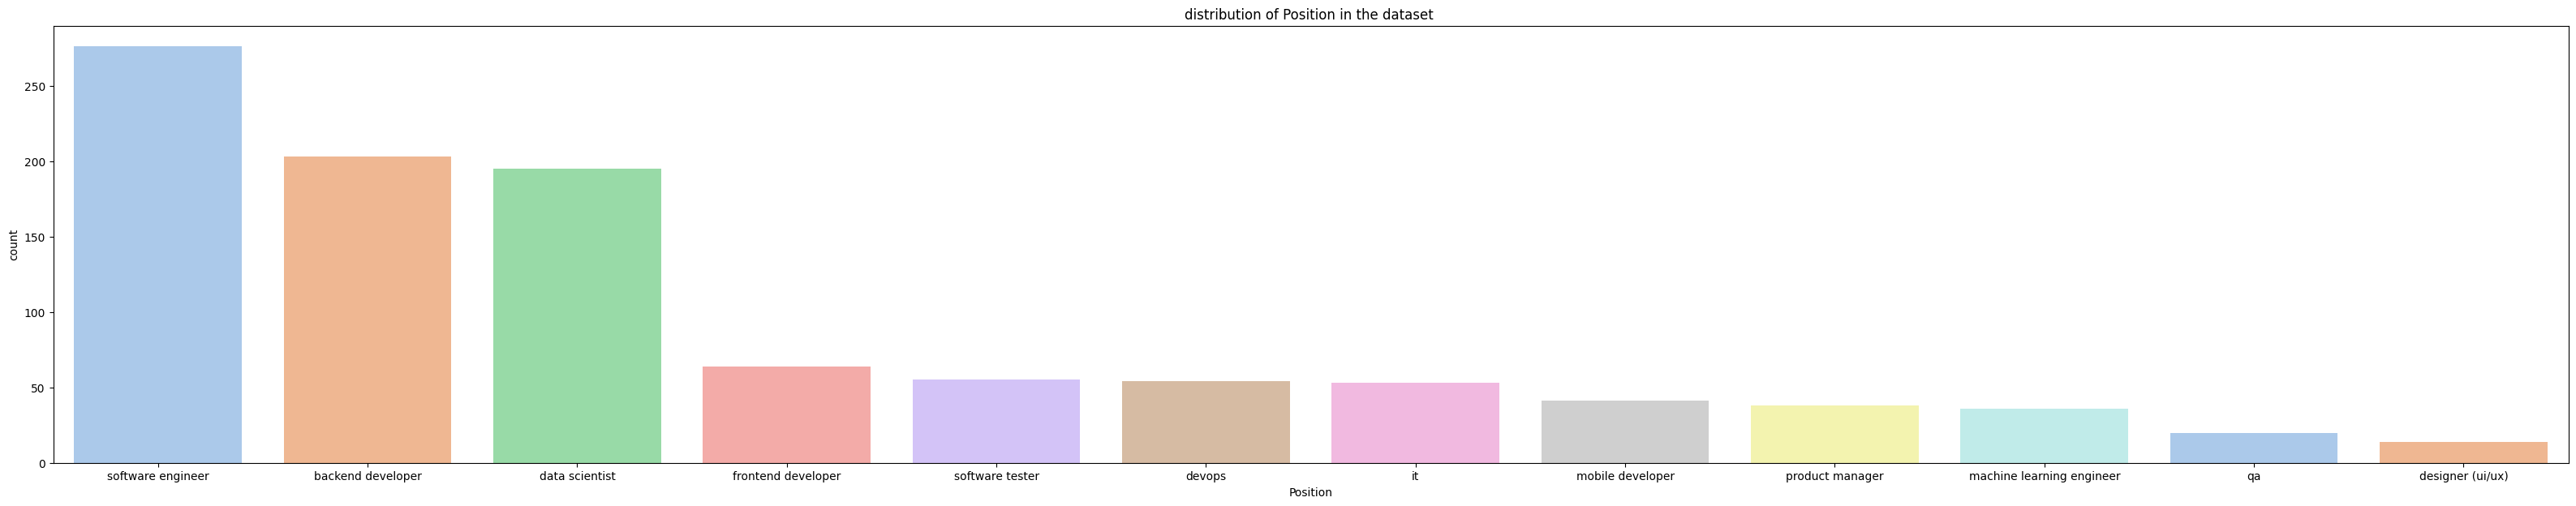

In [342]:
import matplotlib.pyplot as plt
# create a histogram
plt.figure(figsize=(40,7))
sns.countplot(x = 'Position', data = df, palette = 'pastel',order=df['Position'].value_counts().index)
plt.title('distribution of Position in the dataset ')
plt.show()

In [343]:
############################### SENIORITY LEVEL ANALYSIS #################################

In [344]:
# cleaning 
'''
1- principal,lead,head can be mapped to senior 
2- remove senior levels < 2
'''
def clean_senior_col(df):
    meaninigless_values = ['nan','student','working student','no idea, there are no ranges in the firm','no level','no level ']
    df = df[~df['Seniority'].isin(meaninigless_values)]
    for i, row in df.iterrows():
            if row['Seniority'] in ['principal']:
                df.at[i,'Seniority'] = 'senior'
            if row['Seniority'] in ['head']:
                df.at[i,'Seniority'] = 'senior'
            if row['Seniority'] in ['lead']:
                df.at[i,'Seniority'] = 'senior'
    seniority_counts = df['Seniority'].value_counts()
    seniority_counts = seniority_counts[seniority_counts >= 5]
    df = df[df['Seniority'].isin(seniority_counts.index)]
    return df

In [345]:
df = clean_senior_col(df)
seniority_remain_values = df['Seniority'].value_counts()

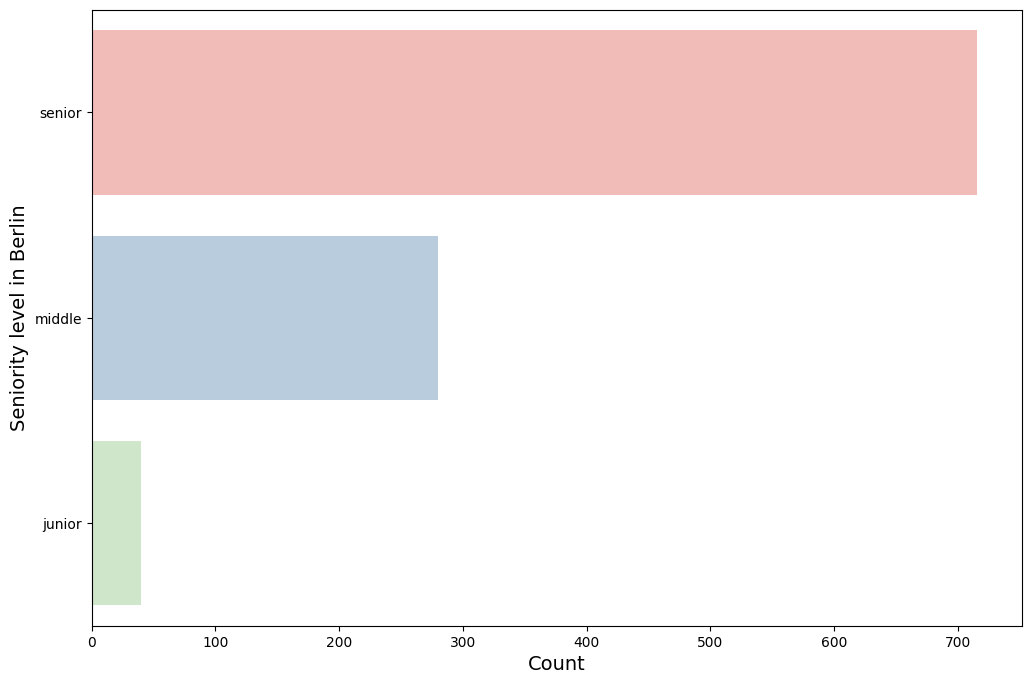

In [346]:
plt.figure(figsize=(12,8))
sns.barplot(y=seniority_remain_values.index,x= seniority_remain_values,palette='Pastel1')
plt.xlabel("Count",fontsize=14)
plt.ylabel("Seniority level in Berlin",fontsize=14)
plt.show()

In [347]:
# analysis for seniors only 
df_senior = df.copy()
df_senior = df_senior[df_senior['Seniority'] =='senior']
# remove position count < 7 for better analysis 
position_counts = df_senior['Position'].value_counts()
position_counts = position_counts[position_counts >= 5]
df_senior = df_senior[df_senior['Position'].isin(position_counts.index)]


In [348]:
############################### SALARY ANALYSIS ##########################################

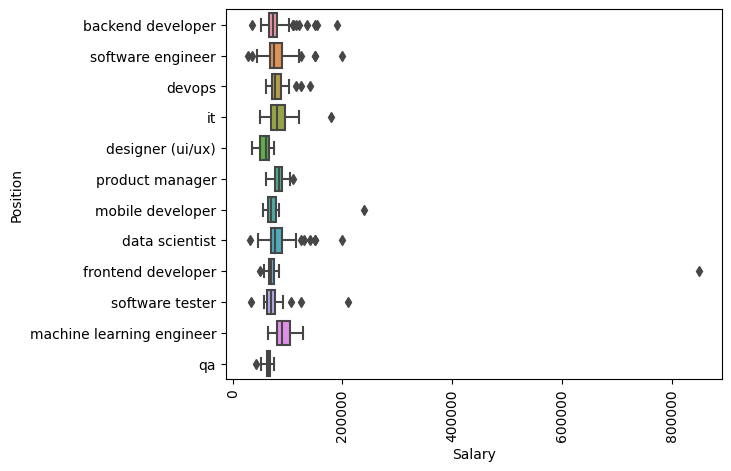

In [349]:
df_senior['Salary'] = pd.to_numeric(df_senior['Salary'])
sns.boxplot(x='Salary', y='Position', data=df_senior)
plt.xticks(rotation=90)
plt.show()

#### Comments:
1. from this blot box it's obvios that we have outliers in the Salaries , this outliers may affect the mean of the the Salary for each position so i will try to remove them first 

In [350]:
# before removing outlier check the highest mean salary 

In [351]:
######################## GET AVG SALARIES IN BERLIN  #######################
df_senior['Salary'] = pd.to_numeric(df_senior['Salary'])
position_salary = df_senior.groupby('Position')['Salary'].sum()
position_salary.sort_values(ascending=False,inplace=True)
position_avg_salary = (position_salary/ df_senior['Position'].value_counts()).sort_values(ascending = False)
top_position = position_avg_salary.index.to_list()
print(position_avg_salary)

Position
frontend developer           91570.000000
machine learning engineer    91384.615385
it                           84572.972973
data scientist               82447.881356
product manager              82311.111111
devops                       81935.135135
software engineer            79225.425926
mobile developer             76783.333333
backend developer            76555.020270
software tester              76093.548387
qa                           63583.333333
designer (ui/ux)             57155.555556
dtype: float64


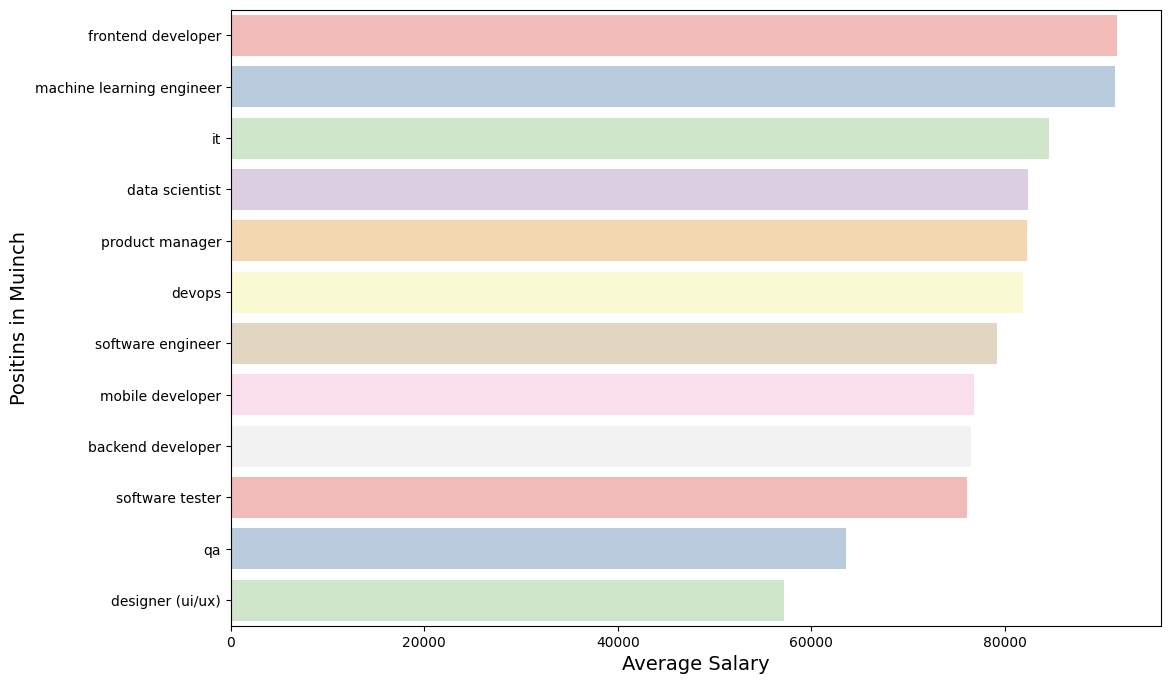

In [352]:
######################## Plot #######################
plt.figure(figsize=(12,8))
sns.barplot(y=top_position,x= position_avg_salary,palette='Pastel1')
plt.xlabel("Average Salary",fontsize=14)
plt.ylabel("Positins in Muinch",fontsize=14)
plt.show()

#### Comments:
1. From the previous visualizations I found that the heighst average salary in Berlin is for three positions 
with this order
--------------------------------------------------
| position | avg_salary |
| -------- | -------- | 
| frontend developer | 91570.000000 | 
| machine learning engineer | 91384.615385 | 
|it | 84572.972973 | 
--------------------------------------------------

2. Expectation: 
    - high positions in Machine learning engineering (head , lead , senior) have higher salaries 
    - high positions in frontend engineering (head , lead , senior) have higher salaries

3. Results Interpretation:
    - high positions in Machine learning engineering (head , lead , senior) have higher salaries (Matched)
    - high positions in frontend engineering (head , lead , senior) have higher salaries (Matched)
    - I also find a new insight which doesn't exist in the expectation, IT Salaries for high positions is high 
4. Additional insights:
    - software tester , qa and designer positions are the positions with the lowest avg salaries 
    - data scientist,product manager and devops are too close to each other 
    - mobile developer and backend developer are too close to each other 


In [353]:
######################################## GET AVG SALARIES IN amsterdam ##################################


In [354]:
# analysis for seniors only 
df_middle = df.copy()
df_middle = df_middle[df_middle['Seniority'] =='middle']
# remove position count < 7 for better analysis 
position_counts = df_middle['Position'].value_counts()
position_counts = position_counts[position_counts >= 5]
df_middle = df_middle[df_middle['Position'].isin(position_counts.index)]

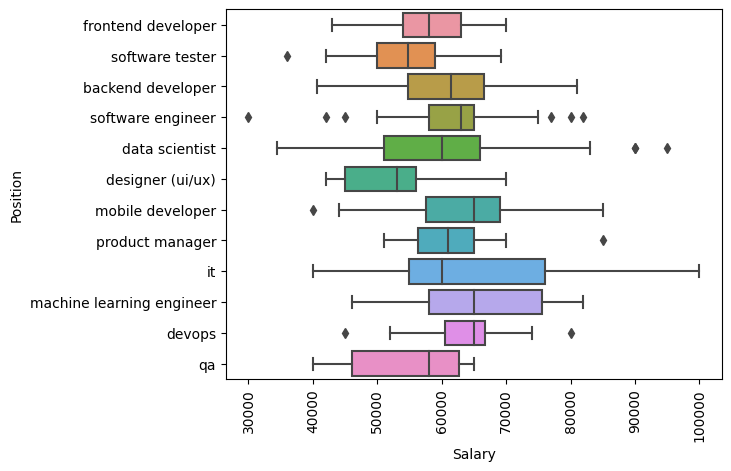

In [355]:
df_middle['Salary'] = pd.to_numeric(df_middle['Salary'])
sns.boxplot(x='Salary', y='Position', data=df_middle)
plt.xticks(rotation=90)
plt.show()

In [356]:
######################## GET AVG SALARIES IN BERLIN  #######################
df_middle['Salary'] = pd.to_numeric(df_middle['Salary'])
position_salary = df_middle.groupby('Position')['Salary'].sum()
position_salary.sort_values(ascending=False,inplace=True)
position_avg_salary = (position_salary/ df_middle['Position'].value_counts()).sort_values(ascending = False)
top_position = position_avg_salary.index.to_list()
print(position_avg_salary)

Position
it                           66090.909091
machine learning engineer    65781.250000
devops                       63642.857143
mobile developer             62545.454545
product manager              62400.000000
software engineer            62112.264151
backend developer            61676.923077
data scientist               59993.896552
frontend developer           58297.380952
software tester              54463.636364
qa                           54342.857143
designer (ui/ux)             53200.000000
dtype: float64


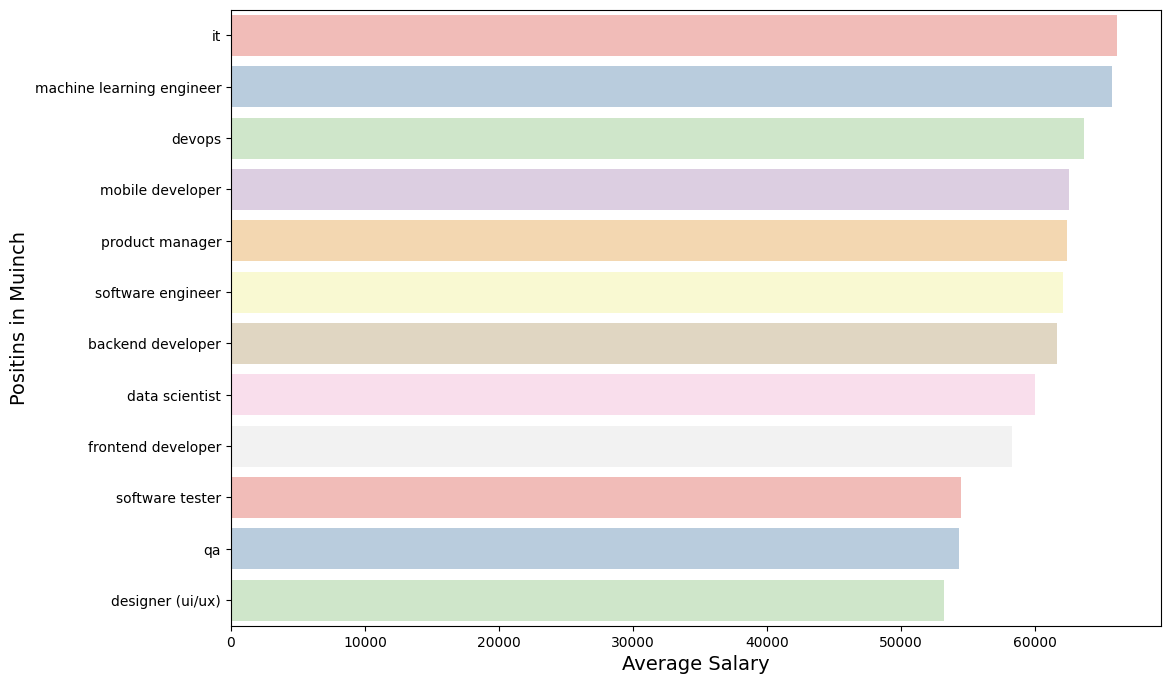

In [357]:
######################## Plot #######################
plt.figure(figsize=(12,8))
sns.barplot(y=top_position,x= position_avg_salary,palette='Pastel1')
plt.xlabel("Average Salary",fontsize=14)
plt.ylabel("Positins in Muinch",fontsize=14)
plt.show()

#### Comments:
1. From the previous visualizations I found that the heighst average salary in Berlin FOR MID POSITIONS is for three positions 
with this order
--------------------------------------------------
| position | avg_salary |
| -------- | -------- | 
| it | 66090.909091 | 
| machine learning engineer | 65781.250000 | 
| devops | 63642.857143 | 
--------------------------------------------------

2. Expectation: 
    - mid positions in Machine learning engineering have higher salaries 
    - mid positions in frontend engineering have higher salaries

3. Results Interpretation:
    - mid positions in Machine learning engineering have higher salaries (Matched) but it doesn't the highiest one
    - mid positions in frontend engineering  have higher salaries (doesn't Match)
    - I also find a new insight which doesn't exist in the expectation, IT Salaries for mid positions is the highiest one  

4. Explaination for doesn't match expectations:
    - for the front end position i found from the data visualizations that the avg Salary for front end engineering isn't highier compared to other positions in this seniority level , I think my expectation was wrong .
5. Additional insights:
    - software tester , qa and designer positions are the positions with the lowest avg salaries 
    - mobile developer ,product manager ,software engineer and backend developer  are too close to each other 


In [358]:
######################################## GET AVG SALARIES IN amsterdam ##################################


In [359]:
# analysis for seniors only 
df_junior = df.copy()
df_junior = df_junior[df_junior['Seniority'] =='junior']
# remove position count < 7 for better analysis 
position_counts = df_junior['Position'].value_counts()
position_counts = position_counts[position_counts >= 5]
df_junior = df_junior[df_junior['Position'].isin(position_counts.index)]



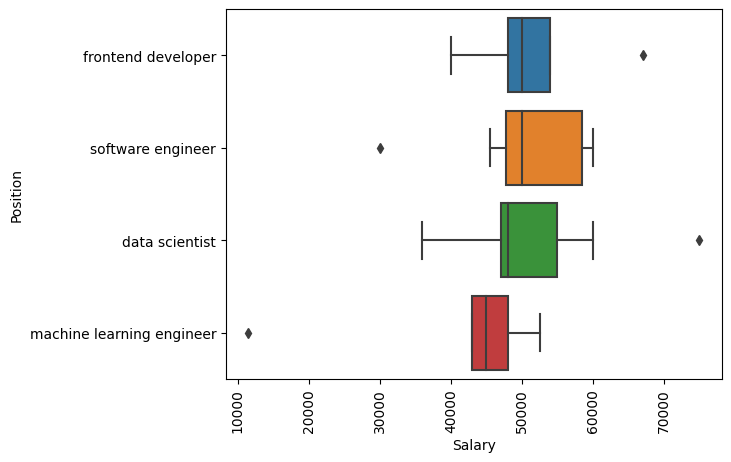

In [360]:
df_junior['Salary'] = pd.to_numeric(df_junior['Salary'])
sns.boxplot(x='Salary', y='Position', data=df_junior)
plt.xticks(rotation=90)
plt.show()

In [361]:
######################## GET AVG SALARIES IN BERLIN  #######################
df_junior['Salary'] = pd.to_numeric(df_junior['Salary'])
position_salary = df_junior.groupby('Position')['Salary'].sum()
position_salary.sort_values(ascending=False,inplace=True)
position_avg_salary = (position_salary/ df_junior['Position'].value_counts()).sort_values(ascending = False)
top_position = position_avg_salary.index.to_list()
print(position_avg_salary)

Position
frontend developer           51800.000000
data scientist               51035.294118
software engineer            50357.142857
machine learning engineer    40000.000000
dtype: float64


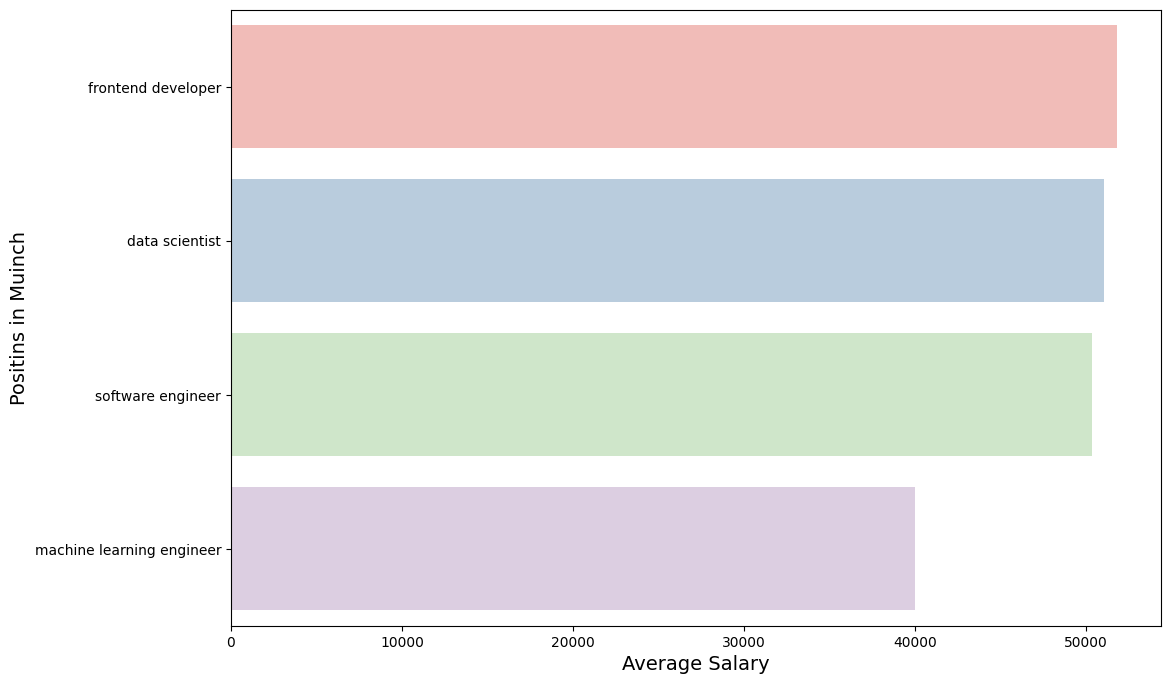

In [362]:
######################## Plot #######################
plt.figure(figsize=(12,8))
sns.barplot(y=top_position,x= position_avg_salary,palette='Pastel1')
plt.xlabel("Average Salary",fontsize=14)
plt.ylabel("Positins in Muinch",fontsize=14)
plt.show()

#### Comments:
1. From the previous visualizations I found that the heighst average salary in Berlin FOR MID POSITIONS is for three positions 
with this order
--------------------------------------------------
| position | avg_salary |
| -------- | -------- | 
| it | 66090.909091 | 
| machine learning engineer | 65781.250000 | 
| devops | 63642.857143 | 
--------------------------------------------------

2. Expectation: 
    - mid positions in Machine learning engineering have higher salaries 
    - mid positions in frontend engineering have higher salaries

3. Results Interpretation:
    - mid positions in Machine learning engineering have higher salaries (Matched) but it doesn't the highiest one
    - mid positions in frontend engineering  have higher salaries (doesn't Match)
    - I also find a new insight which doesn't exist in the expectation, IT Salaries for mid positions is the highiest one  

4. Explaination for doesn't match expectations:
    - for the front end position i found from the data visualizations that the avg Salary for front end engineering isn't highier compared to other positions in this seniority level , I think my expectation was wrong .
5. Additional insights:
    - software tester , qa and designer positions are the positions with the lowest avg salaries 
    - mobile developer ,product manager ,software engineer and backend developer  are too close to each other 